In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import classlib4334
import scipy.optimize as opt

## Problem 1

### Find a polynomial model for each dataset that fits both of them well.

In [2]:
df_brake_1 = pd.read_excel("hw-02a-data/braking-distance-1.xlsx")
df_brake_2 = pd.read_excel("hw-02a-data/braking-distance-2.xlsx")

In [3]:
df_brake_1.head()

,Unnamed: 0,Speed [mph],Speed [m/s],Distance [m]
0,0,5,2.233333,2.582413
1,1,10,4.466667,5.794310
2,2,15,6.700000,8.232972
3,3,20,8.933333,14.569328
4,4,25,11.166667,19.234684


In [4]:
df_brake_2.head()

,Unnamed: 0,Speed [mph],Speed [m/s],Distance [m]
0,0,5,2.233333,1.459010
1,1,10,4.466667,2.341386
2,2,15,6.700000,5.733606
3,3,20,8.933333,6.471559
4,4,25,11.166667,9.348217


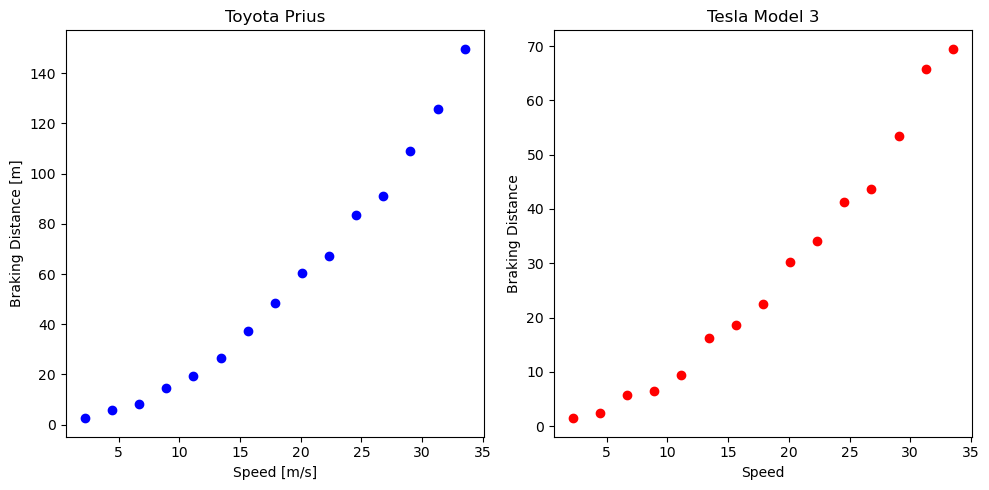

In [23]:
plt.figure(figsize=(10, 5))

# Plot the data from the first run
plt.subplot(1, 2, 1)
plt.scatter(df_brake_1['Speed [m/s]'], df_brake_1['Distance [m]'], color='blue', label='Toyota Prius Data')
plt.title('Toyota Prius')
plt.xlabel('Speed [m/s]')
plt.ylabel('Braking Distance [m]')

# Plot the data from the second run
plt.subplot(1, 2, 2)
plt.scatter(df_brake_2['Speed [m/s]'], df_brake_2['Distance [m]'], color='red', label='Tesla Model 3 Data')
plt.title('Tesla Model 3')
plt.xlabel('Speed')
plt.ylabel('Braking Distance')

plt.tight_layout()
plt.savefig("plots/raw-data-cars.png")
plt.show()

In [9]:
def p1(x, a, b):
    return a + b*x

def p2(x, a, b, c):
    return a + b*x + c*x**2

def p3(x, a, b, c, d):
    return a + b*x + c*x**2 + d*x**3

def p4(x, a, b, c, d, e):
    return a + b*x + c*x**2 + d*x**3 + e*x**4

def p5(x, a, b, c, d, e, f):
    return a + b*x + c*x**2 + d*x**3 + e*x**4 + f*x**5

def p6(x, a, b, c, d, e, f, g):
    return a + b*x + c*x**2 + d*x**3 + e*x**4 + f*x**5 + g*x**6

def p7(x, a, b, c, d, e, f, g, h):
    return a + b*x + c*x**2 + d*x**3 + e*x**4 + f*x**5 + g*x**6 + h*x**7

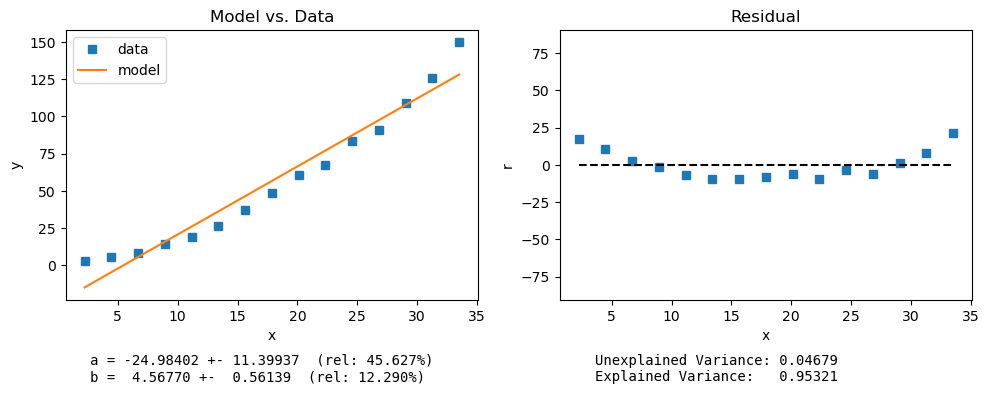

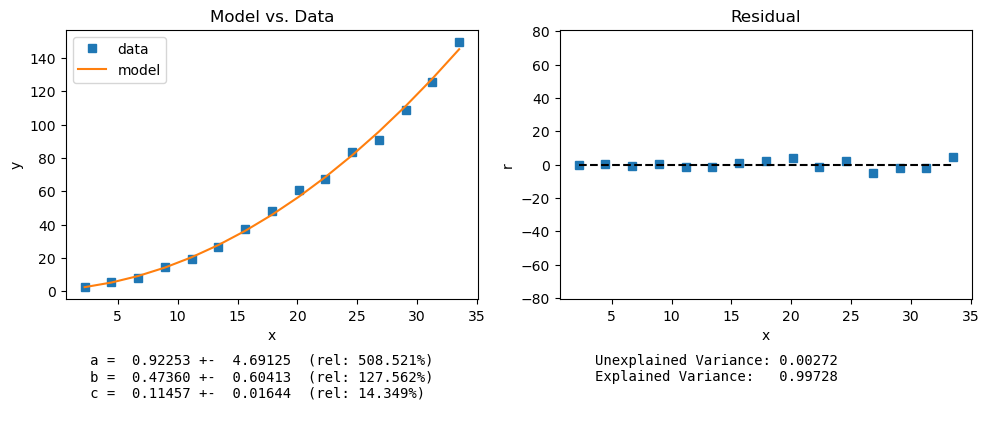

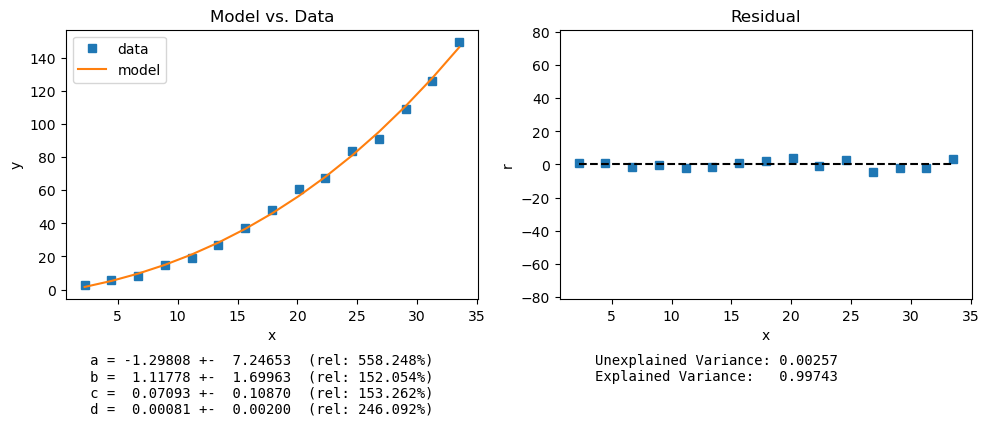

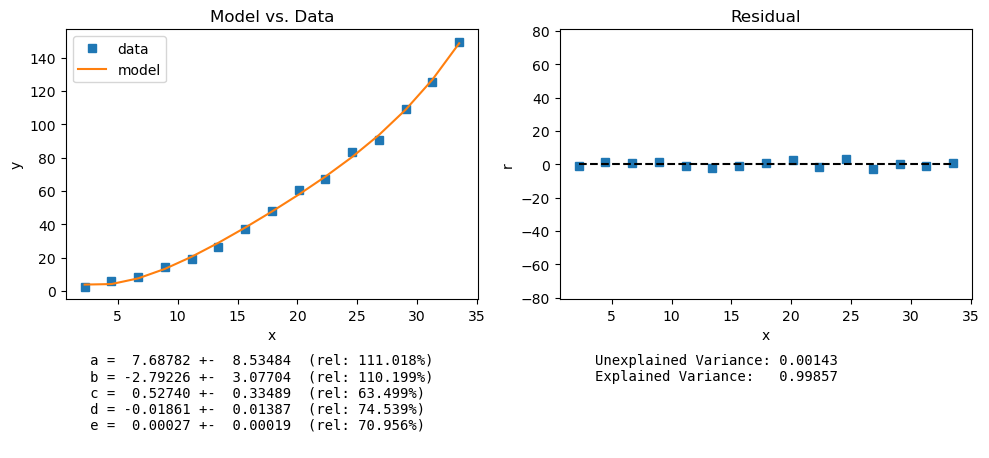

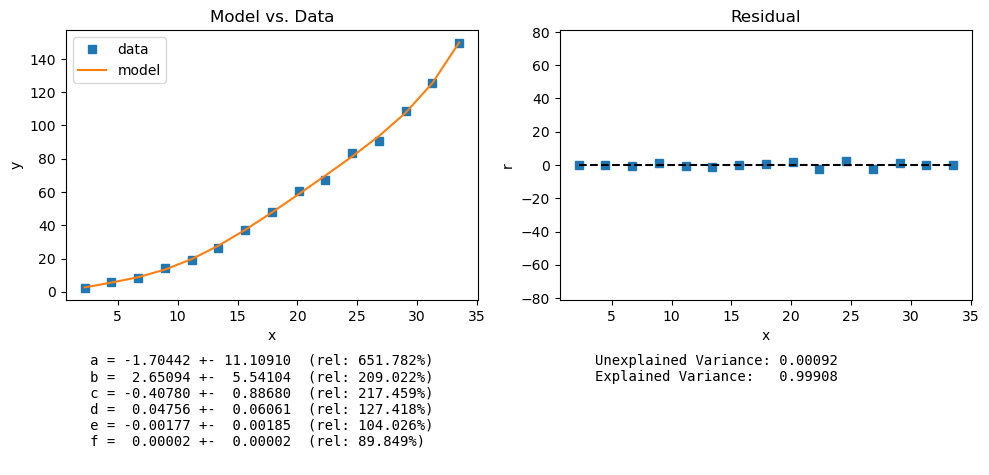

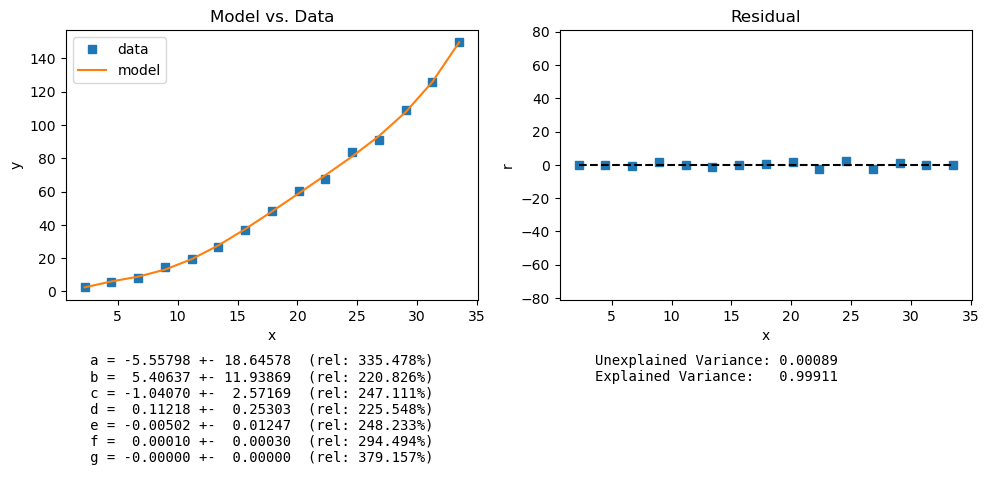

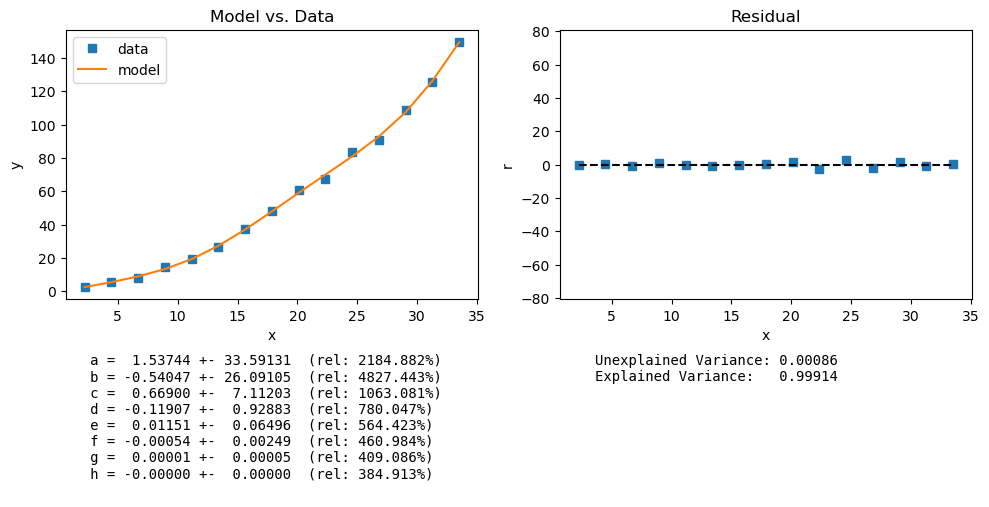

In [13]:
x = df_brake_1["Speed [m/s]"]
y = df_brake_1["Distance [m]"]
fit1, err1 = classlib4334.fit_and_plot(p1, x, y, residual=True)
fit2, err2 = classlib4334.fit_and_plot(p2, x, y, residual=True)
fit3, err3 = classlib4334.fit_and_plot(p3, x, y, residual=True)
fit4, err4 = classlib4334.fit_and_plot(p4, x, y, residual=True)
fit5, err5 = classlib4334.fit_and_plot(p5, x, y, residual=True)
fit6, err6 = classlib4334.fit_and_plot(p6, x, y, residual=True)
fit7, err7 = classlib4334.fit_and_plot(p7, x, y, residual=True)

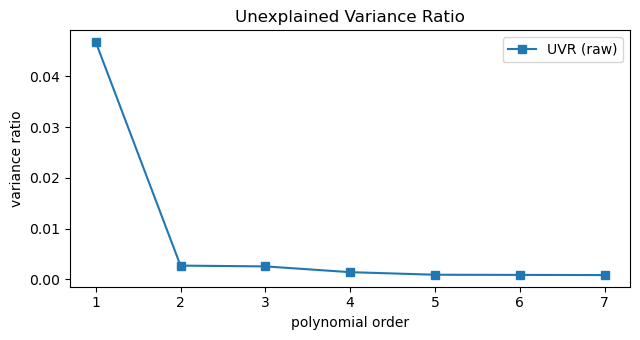

In [16]:
pvals = [1, 2, 3, 4, 5, 6, 7]
models = [p1, p2, p3, p4, p5, p6, p7]

uvrs = []
evrs = []
for n, f in zip(pvals, models):
    pfit, pcov = opt.curve_fit(f, x, y)
    ymean = np.mean(y)
    ypred = f(x, *pfit)
    ssres = np.sum((y - ypred)**2)
    sstot = np.sum((y - ymean)**2)
    N = len(y)
    P = len(pfit)
    uvr = ssres/sstot
    evr = 1-uvr
    uvrs.append(uvr)
    evrs.append(evr)

fig, ax = plt.subplots(figsize=(6.5,3.5))
ax.plot(pvals, uvrs, 's-', label="UVR (raw)")
ax.set_xlabel('polynomial order')
ax.set_ylabel('variance ratio')
ax.set_title('Unexplained Variance Ratio')
ax.legend(loc='best')
ax.set_xticks(pvals)
fig.tight_layout()
plt.show()

In [24]:
def p2xa(x, b, c):
    return b*x + c*x**2
def p2xab(x, c):
    return c*x**2

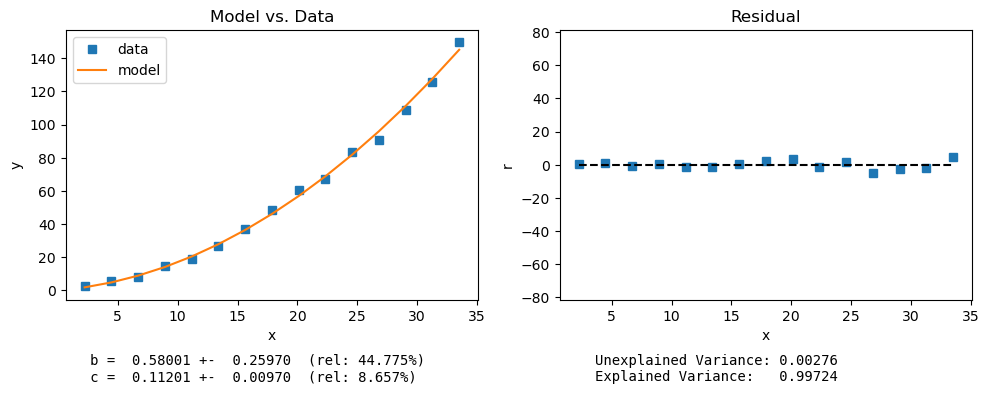

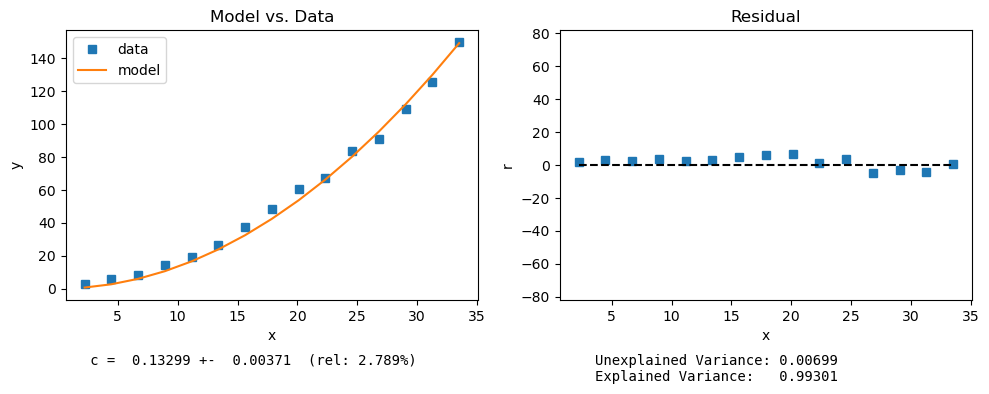

In [25]:
fit2xa, err2xa = classlib4334.fit_and_plot(p2xa, x, y, residual=True)
fit2xab, err2xab = classlib4334.fit_and_plot(p2xab, x, y, residual=True)

### Justify the order of, and terms in, the polynomial you chose

### Record the polynomial co-efficients you obtained (for future use)

### Use your model to predict the braking distance for each case if the speed were 100 mph.

### Discuss whether your prediction seems reasonable, and any limitations that should be considered.